In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
icecream=pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Ice%20Cream.csv")

In [7]:
icecream.head()

,Temperature,Revenue
0,24.6,535
1,26.1,626
2,27.8,661
3,20.6,488
4,11.6,317


In [8]:
icecream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [9]:
icecream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.281600,522.058000
std,8.097597,175.410399
min,0.000000,10.000000
25%,17.175000,406.000000
50%,22.400000,530.000000
75%,27.800000,643.000000
max,45.000000,1000.000000


In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [11]:
X=icecream[['Temperature']]

In [12]:
y=icecream['Revenue']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=2529)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((375, 1), (125, 1), (375,), (125,))

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred=model.predict(X_test)

In [17]:
model.coef_

array([21.4695184])

In [18]:
model.intercept_

44.018097590245816

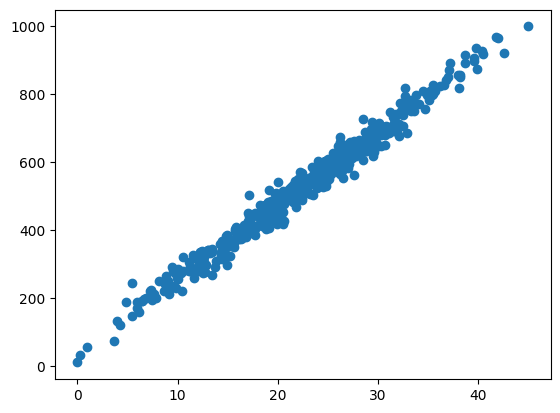

In [19]:
plt.scatter(X,y)
plt.show()

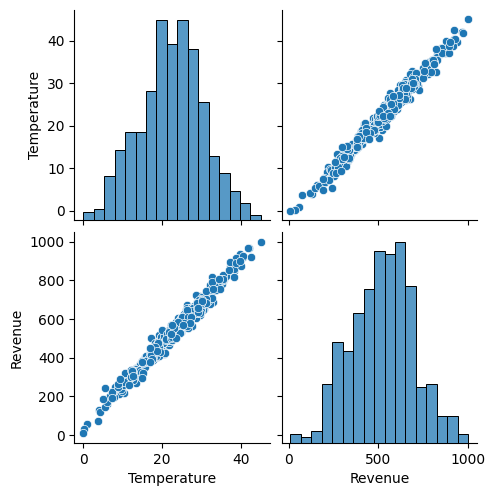

In [20]:
sns.pairplot(icecream)

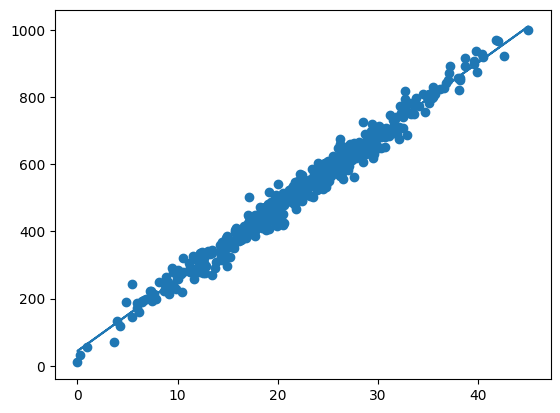

In [21]:
line=model.coef_*X+model.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [22]:
data=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
data

,Actual,Predicted
163,649,645.164613
45,397,381.089536
244,192,181.423015
230,279,247.978522
421,406,415.440766
...,...,...
274,536,522.788358
252,213,207.186437
306,760,741.777446
84,655,673.074987


In [23]:
print("Training Score:",model.score(X_train,y_train))
print("Testing Score:",model.score(X_test,y_test))

Training Score: 0.9781820533168901
Testing Score: 0.9841801999698918


In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))

Mean Absolute Error: 18.369558283712276
Mean Squared Error: 517.4978493670571


C:\Users\Aneesh\AppData\Local\Temp\ipykernel_15052\2017514173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=icecream['Temperature'],bins=10)


<Axes: ylabel='Density'>

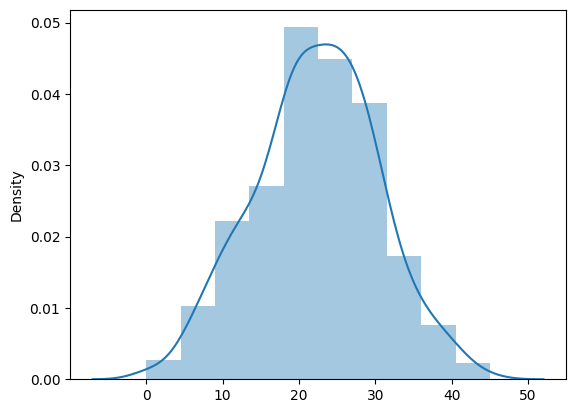

In [25]:
sns.distplot(x=icecream['Temperature'],bins=10)

C:\Users\Aneesh\AppData\Local\Temp\ipykernel_15052\2322005380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=icecream['Revenue'],bins=10)


<Axes: ylabel='Density'>

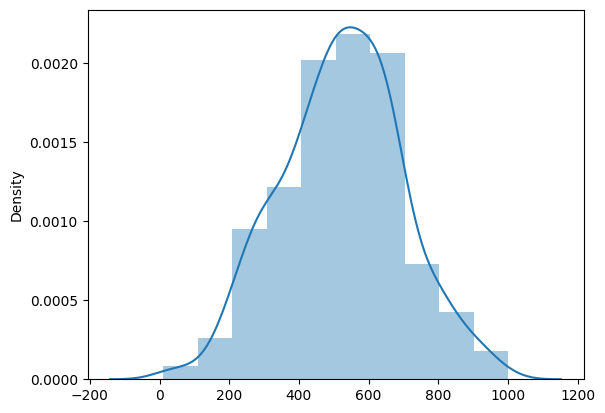

In [26]:
sns.distplot(x=icecream['Revenue'],bins=10)

In [27]:
pip install -q gradio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
 pip install --upgrade pip

In [38]:
import gradio as gr
def Revenue(Temperature):
    x=np.array([Temperature])

    prediction=model.predict(x.reshape(1,-1))

    return prediction

Create A Gradio interface

In [43]:

app=gr.Interface(fn=Revenue,inputs=['number'],outputs="number",description="This is an Ice-Cream Revenue Model")
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://3b21db3e400ef65791.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


c:\Users\Aneesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Aneesh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
